# IMPORTING MODULES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
from sklearn import preprocessing as pp
le = pp.LabelEncoder()
y = le.fit_transform(data['Species'])

In [4]:
data['Type']=y

In [5]:
data.sample(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Type
29,30,4.7,3.2,1.6,0.2,Iris-setosa,0
134,135,6.1,2.6,5.6,1.4,Iris-virginica,2
110,111,6.5,3.2,5.1,2.0,Iris-virginica,2
76,77,6.8,2.8,4.8,1.4,Iris-versicolor,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
129,130,7.2,3.0,5.8,1.6,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
36,37,5.5,3.5,1.3,0.2,Iris-setosa,0
108,109,6.7,2.5,5.8,1.8,Iris-virginica,2
140,141,6.7,3.1,5.6,2.4,Iris-virginica,2


# Exploratory Data Analysis

In [6]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Type           150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [7]:
print(f"Data set has {data.shape[0]} rows and {data.shape[1]} columns")
print(f"Missing value is dataset ?: {data.isnull().sum().any()}")

Data set has 150 rows and 7 columns
Missing value is dataset ?: False


In [8]:
for a in data.columns:
    missing = np.mean(data[a].isnull())
    print("{} - {}%".format(a,round(missing*100)))

Id - 0%
SepalLengthCm - 0%
SepalWidthCm - 0%
PetalLengthCm - 0%
PetalWidthCm - 0%
Species - 0%
Type - 0%


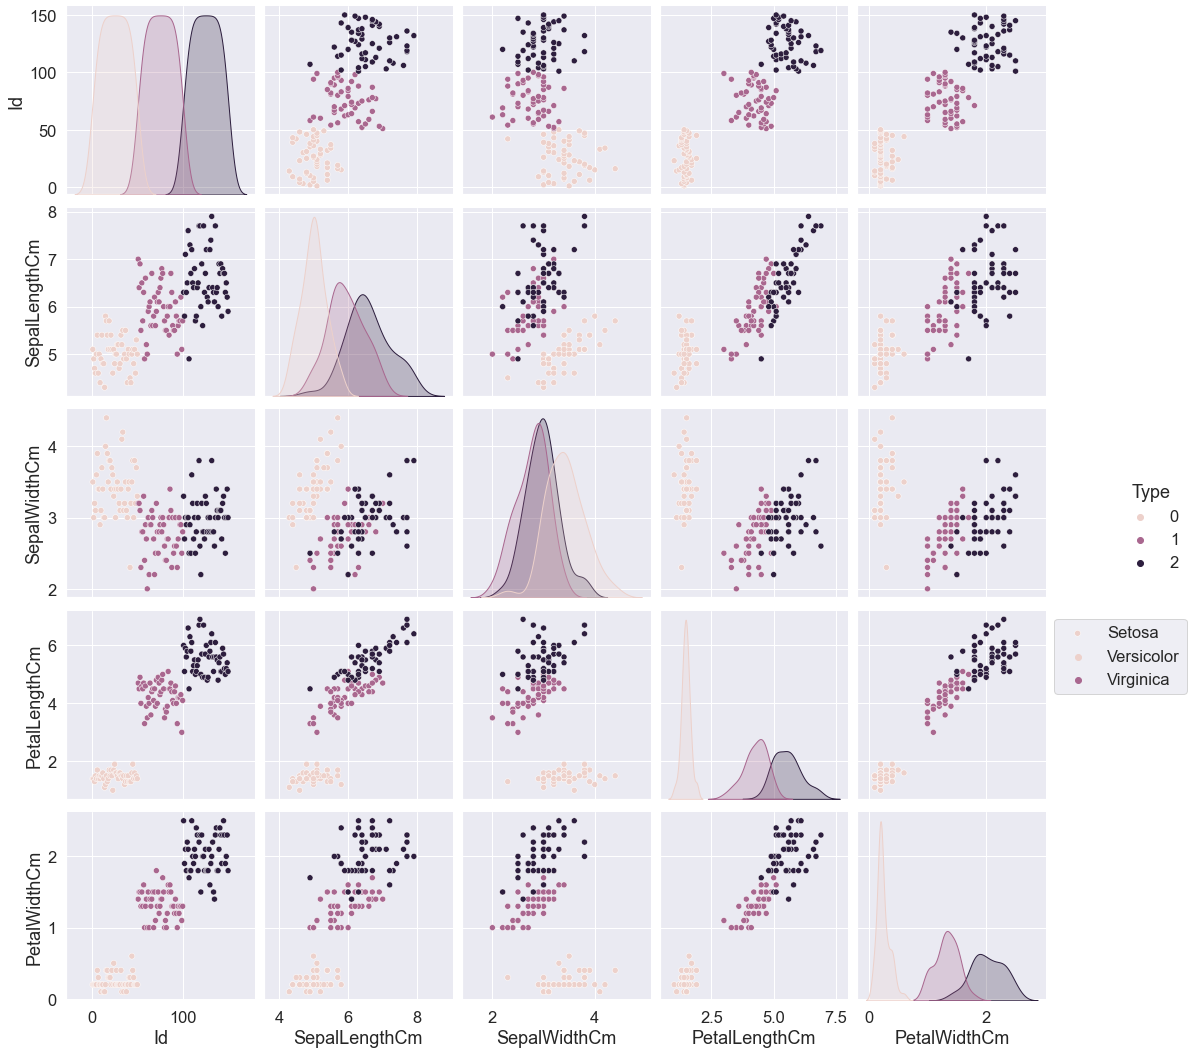

In [9]:

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.pairplot(data,hue="Type",size=3);
plt.legend(["Setosa","Versicolor","Virginica"],bbox_to_anchor = (1 , 1))
plt.show()

Correlation matrix


<AxesSubplot:>

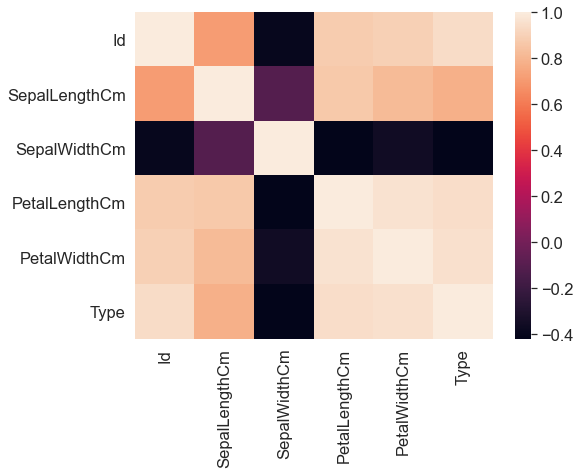

In [10]:
print("Correlation matrix")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(data.corr())

# CREATING MODEL

In [5]:
#splitting data
from sklearn.model_selection import train_test_split
features = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
types = data["Type"]
train_features, test_features, train_types, test_types = train_test_split(features,types,train_size=0.8, random_state=1)

In [6]:
#creating decision tree model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_types)

In [7]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [8]:
a = ['Setosa','Versicolor','Virginica']
b = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

# MODEL REPESENTED GRAPHICALLY

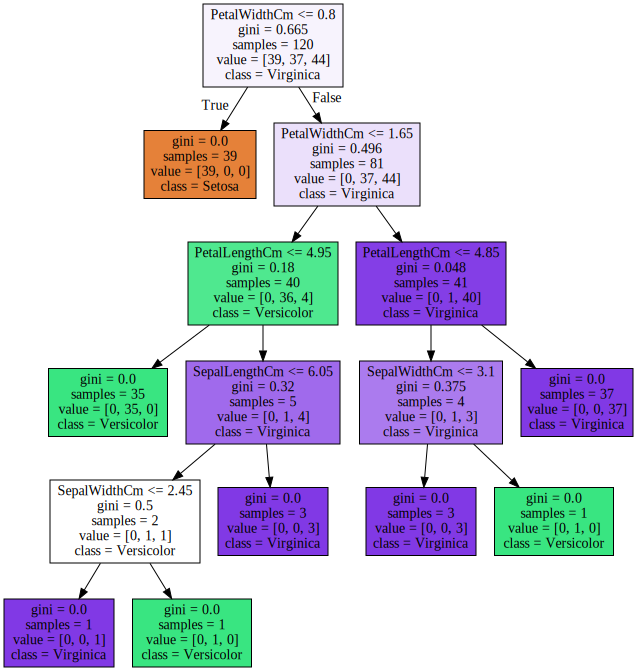

In [11]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=b,  
                                class_names=a,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [9]:
def prediction(x):
    prediction = clf.predict(x)
    if prediction == 0:
        print("Iris setosa")
    elif prediction == 1:
            print("Iris versicolor")
    elif prediction == 2:
            print("Iris virginica")

In [18]:
#asking user input
sl=input("Enter Sepal length in cm:")
sw=input("Enter Sepal Width in cm:")
pl=input("Enter petal length in cm:")
pw=input("Enter petal Width in cm:")

Enter Sepal length in cm:6
Enter Sepal Width in cm:5
Enter petal length in cm:4
Enter petal Width in cm:4


In [19]:

inp_data = pd.DataFrame({"SepalLengthCm" : [sl],"SepalWidthCm" : [sw],"PetalLengthCm" : [pl],"PetalWidthCm":[pw]})

In [20]:
a=inp_data.get("SepalLengthCm")
pd.to_numeric(a, errors='coerce')
b=inp_data.get("SepalWidthCm")
pd.to_numeric(a, errors='coerce')
c=inp_data.get("PetalLengthCm")
pd.to_numeric(a, errors='coerce')
d=inp_data.get("PetalWidthCm")
pd.to_numeric(a, errors='coerce')
dat = pd.DataFrame({"SepalLengthCm":[a],"SepalWidthCm":[b],"PetalLengthCm":[c],"PetalWidthCm":[d]})

In [21]:
input(print("Predict? (Y/N)"))
if "Y"or"y":
    prediction(dat)
else:
    exit()

Predict? (Y/N)
Noney
Iris versicolor


# TEST DATA prediction

In [13]:
#Using test data from the data set
pred=clf.predict(test_features)
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [13]:
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
accuracy = accuracy_score(test_types, pred)
recall = recall_score(test_types, pred , average="weighted")
precision = precision_score(test_types, pred , average="weighted")
f1 = f1_score(test_types, pred, average="weighted")

In [17]:
print("-----------------Accuracy,recall,precision,f1 scores of the created model-----------------------")
print("The accuracy is:",accuracy)
print("recall score is:",recall)
print("Precision score is:",precision)
print("The f1 score is:",f1)

-----------------Accuracy,recall,precision,f1 scores of the created model-----------------------
The accuracy is: 0.9666666666666667
recall score is: 0.9666666666666667
Precision score is: 0.9714285714285714
The f1 score is: 0.9672820512820512


A WORK DONE BY KAILASH CHANDRAN. STUDENT @ RATHINAM CAS ,CBE,TAMIL NADU.
DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION- GRIP PROGRAMME 